In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import csv
import random


In [2]:
colors = [
    "#ABDEE6",
    "#CBAACB",
    "#FFFFB5",
    "#FFCCB6",
    "#F3B0C3",
    "#C6DBDA",
    "#FEE1E8",
    "#FED7C3",
    "#F6EAC2",
    "#ECD5E3",
    "#FF968A",
    "#FFAEA5",
    "#FFC5BF",
    "#FFD8BF",
    "#FFC8A2",
    "#D4F0F0",
    "#8FCACA",
    "#CCE2CB",
    "#B6CFB6",
    "#97C1A9",
    "#FCB9AA",
    "#FFDBCC",
    "#ECEAE4",
    "#A2E1DB",
    "#55CBCD"
]


# Visualising Input Data


In [10]:
number = '10'

in_filename = 'C:/Users/tevle/Desktop/University/Third Year/Advanced Analysis of Algorithms/Assignment/Input/in' + number + '.csv'

rectangles = []

with open(in_filename) as csv_in_file:
    csv_reader = csv.reader(csv_in_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            headers = row
        else:
            rectangles.append(row)
        line_count += 1

csv_in_file.close()


In [6]:
print(headers)
for rectangle in rectangles:
    print(rectangle)


['Number', 'x1', 'y1', 'x2', 'y2']
['0', '0', '0', '49903', '50364']
['1', '49903', '50364', '75161', '74880']
['2', '49903', '74880', '75161', '100000']
['3', '75161', '50364', '100000', '74880']
['4', '75161', '74880', '87230', '87625']
['5', '75161', '87625', '87230', '100000']
['6', '87230', '87625', '93639', '93983']
['7', '87230', '93983', '93639', '100000']
['8', '93639', '93983', '96665', '96888']
['9', '93639', '96888', '96665', '100000']
['10', '96665', '93983', '100000', '96888']
['11', '96665', '96888', '100000', '100000']
['12', '87230', '81104', '93761', '87625']
['13', '93761', '74880', '100000', '81104']
['14', '93761', '81104', '100000', '87625']
['15', '87230', '74880', '90199', '77772']
['16', '87230', '77772', '90199', '81104']
['17', '90199', '77772', '91908', '79314']
['18', '90199', '79314', '91908', '81104']
['19', '91908', '79314', '93761', '81104']
['20', '0', '50364', '24712', '75568']
['21', '24712', '50364', '49903', '75568']
['22', '24712', '75568', '49903

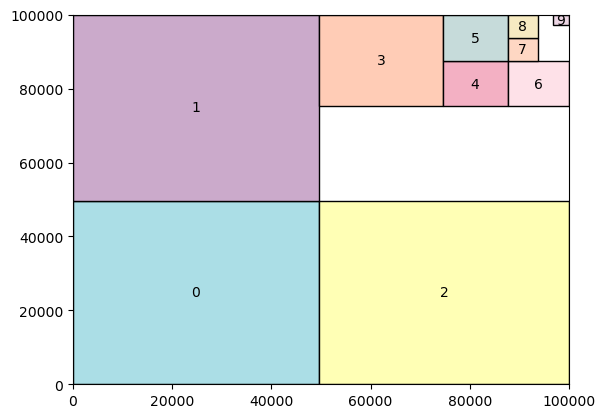

In [12]:
fig, ax = plt.subplots()

for i in range(len(rectangles)):
    # color = '#'+random.randbytes(3).hex()
    # color = colors[random.randint(0, len(colors) - 1)]
    color = colors[i % len(colors)]
    r = rectangles[i]
    anchor = (int(r[1]), int(r[2]))
    width = int(r[3]) - int(r[1])
    height = int(r[4]) - int(r[2])
    rectangle = Rectangle(anchor, width, height, fill=True,
                          facecolor=color, edgecolor='#000000')
    ax.add_patch(rectangle)
    rx, ry = rectangle.get_xy()
    cx = rx + rectangle.get_width()/2.0
    cy = ry + rectangle.get_height()/2.0
    ax.annotate(r[0], (cx, cy), color='black',
                fontsize=10, ha='center', va='center')

# display plot
ax.set_xlim(left=0, right=100_000)
ax.set_ylim(bottom=0, top=100_000)
plt.show()


# Interpretting Output Data


In [8]:
out_filename = '/Sample/sample_output.csv'

data = []

with open(out_filename) as csv_out_file:
    csv_reader = csv.reader(csv_out_file, delimiter=',')
    for row in csv_reader:
        data.append(row)


FileNotFoundError: [Errno 2] No such file or directory: '/Sample/sample_output.csv'

In [ ]:
for d in data:
    print(d)


['1', '3', '3', '16', '5', '9', '4', '16', '11', '15', '5', '16', '18', '22']
['2', '1', '5', '16', '26', '29']
['3', '0']
['4', '1', '9', '32', '12', '15']
['5', '2', '6', '25', '18', '22', '7', '25', '25', '29']
['6', '0']
['7', '1', '8', '27', '28', '29']
['8', '0']
['9', '1', '10', '36', '13', '19']
['10', '1', '11', '39', '14', '21']
['11', '0']


The output is in the format:

$$
[\textrm{Rectangle Number}],[\textrm{Number of Adjacent Rectangles}],[\textrm{Rectangle Number of Adjacent Rectangle}],[x],[y_b],[y_t]
$$


In [ ]:
for d in data:
    rectangle_num = d[0]
    num_adjacent = int(d[1])

    if num_adjacent == 0:
        print(f"Rectangle {rectangle_num} has no adjacent rectangles")
    else:
        details = ''
        for i in range(num_adjacent):
            adj_rect_num = d[2 + i*4]
            x = d[3+(i*4)]
            yb = d[4 + i*4]
            yt = d[5 + (i*4)]

            details += f" Rectangle {adj_rect_num} from ({x},{yb}) to ({x},{yt})"
            if i != num_adjacent - 1:
                details += ','

        if num_adjacent == 1:
            print(
                f"Rectangle {rectangle_num} is adjacent to {num_adjacent} rectangle:" + details)
        else:
            print(
                f"Rectangle {rectangle_num} is adjacent to {num_adjacent} rectangles:" + details)


Rectangle 1 is adjacent to 3 rectangles: Rectangle 3 from (16,5) to (16,9), Rectangle 4 from (16,11) to (16,15), Rectangle 5 from (16,18) to (16,22)
Rectangle 2 is adjacent to 1 rectangle: Rectangle 5 from (16,26) to (16,29)
Rectangle 3 has no adjacent rectangles
Rectangle 4 is adjacent to 1 rectangle: Rectangle 9 from (32,12) to (32,15)
Rectangle 5 is adjacent to 2 rectangles: Rectangle 6 from (25,18) to (25,22), Rectangle 7 from (25,25) to (25,29)
Rectangle 6 has no adjacent rectangles
Rectangle 7 is adjacent to 1 rectangle: Rectangle 8 from (27,28) to (27,29)
Rectangle 8 has no adjacent rectangles
Rectangle 9 is adjacent to 1 rectangle: Rectangle 10 from (36,13) to (36,19)
Rectangle 10 is adjacent to 1 rectangle: Rectangle 11 from (39,14) to (39,21)
Rectangle 11 has no adjacent rectangles


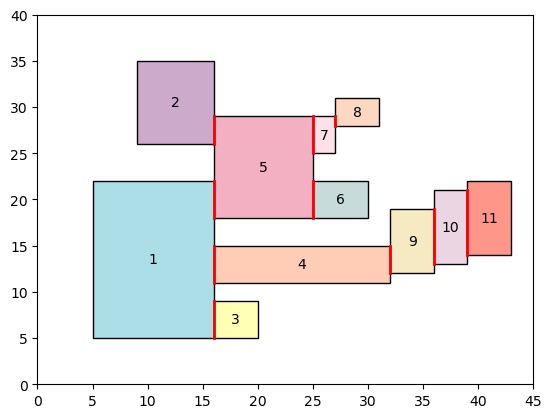

In [ ]:
fig, ax = plt.subplots()

for i, d in enumerate(data):
    color = colors[i % len(colors)]
    r = rectangles[i]
    anchor = (int(r[1]), int(r[2]))
    width = int(r[3]) - int(r[1])
    height = int(r[4]) - int(r[2])
    rectangle = Rectangle(anchor, width, height, fill=True,
                          facecolor=color, edgecolor='#000000')
    ax.add_patch(rectangle)
    rx, ry = rectangle.get_xy()
    cx = rx + rectangle.get_width()/2.0
    cy = ry + rectangle.get_height()/2.0
    ax.annotate(r[0], (cx, cy), color='black',
                fontsize=10, ha='center', va='center')

    num_adj = int(d[1])
    for j in range(num_adj):
        x = int(d[3 + j*4])
        yb = int(d[4 + j*4])
        yt = int(d[5 + j*4])

        plt.plot([x, x], [yb, yt], color='red', linewidth=2)

# display plot
ax.set_xlim(left=0, right=45)
ax.set_ylim(bottom=0, top=40)
plt.show()
